<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/04-regularization/Regularization_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

Consider the following toy dataset with pairs of correlated features:

In [3]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

100%|██████████| 100/100 [00:00<00:00, 1292.66it/s]


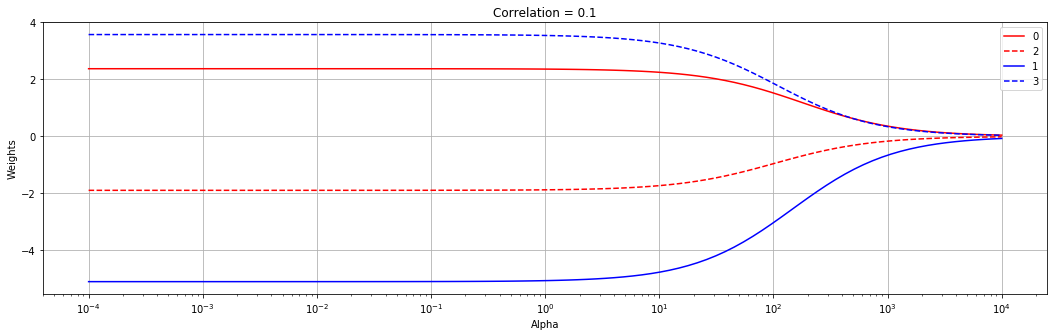

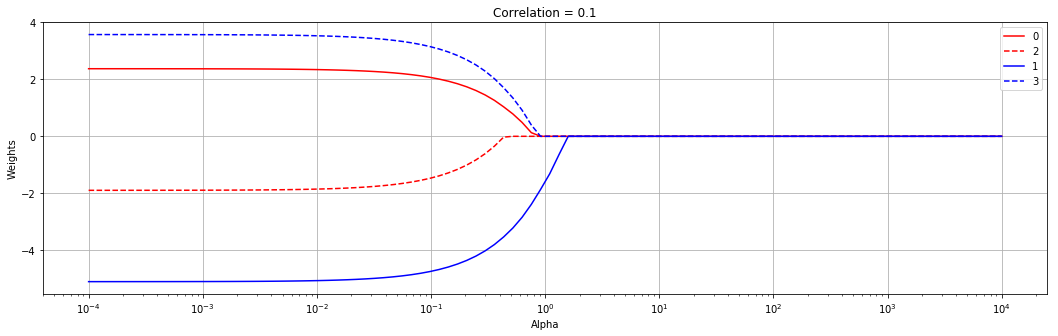

100%|██████████| 100/100 [00:00<00:00, 1290.44it/s]


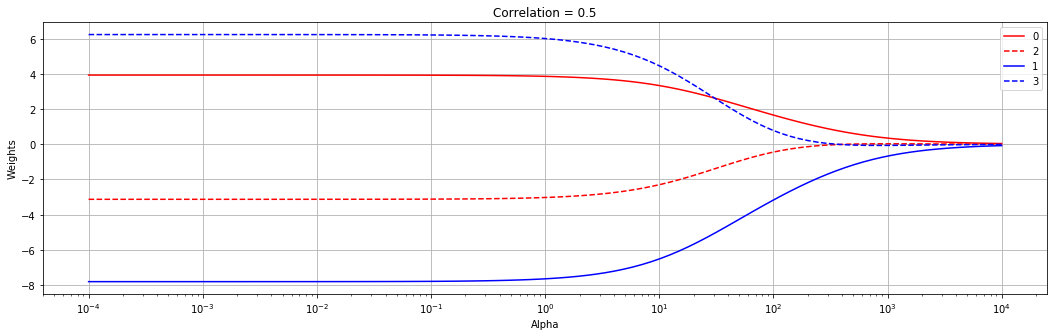

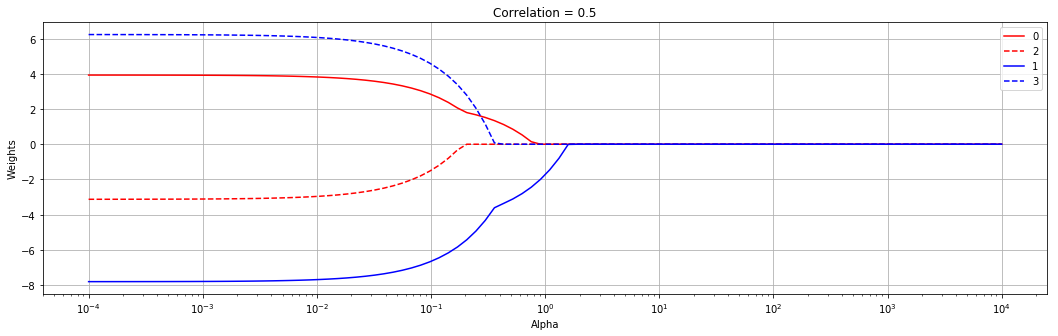

100%|██████████| 100/100 [00:00<00:00, 1109.87it/s]


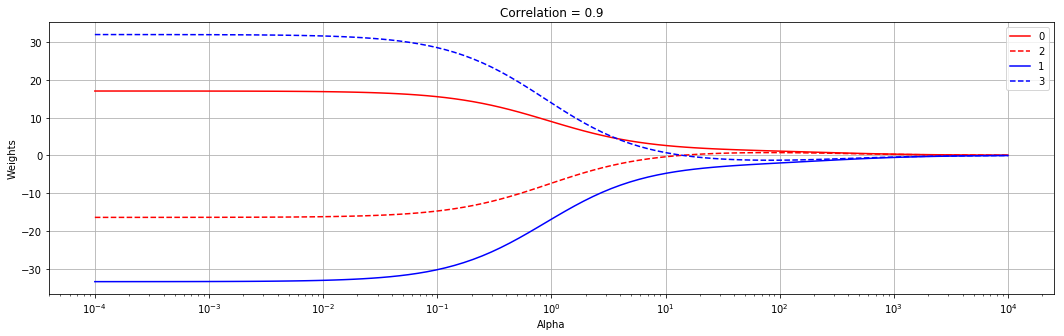

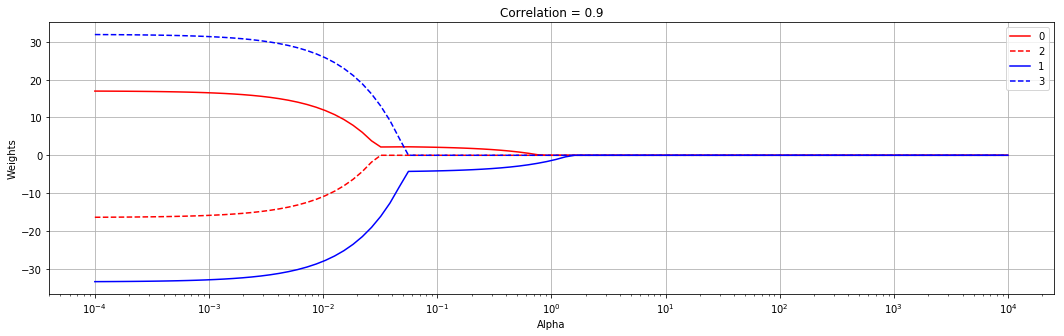

In [9]:
from tqdm import tqdm

for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
    X, y = gen_data(500, correlation)

  # regularization powers:
    alpha_values = np.logspace(-4, 4, 100, base=10)

  # lists to collect models' parameters:
    params_ridge = []
    params_lasso = []

    for alpha in tqdm(alpha_values):
        mod_ridge = Ridge(fit_intercept=False, alpha=alpha)
        mod_lasso = Lasso(fit_intercept=False, alpha=alpha)
        mod_ridge.fit(X, y)
        mod_lasso.fit(X, y)
        params_ridge.append(mod_ridge.coef_)
        params_lasso.append(mod_lasso.coef_)

    params_ridge = np.array(params_ridge)
    params_lasso = np.array(params_lasso)
    
    #split to parameters
    p0 = params_ridge[:, 0]
    p1 = params_ridge[:, 1]
    p2 = params_ridge[:, 2]
    p3 = params_ridge[:, 3]
    

    plt.figure(figsize=(18, 5))
    
    #red color for festures 0 and 2 
    plt.plot(alpha_values, p0, color='red', label='0')
    plt.plot(alpha_values, p2, '--', color='red', label='2')

    #blue color for features 1 and 3 
    plt.plot(alpha_values, p1, color='blue', label='1')
    plt.plot(alpha_values, p3, '--', color='blue', label='3')

    plt.xscale('log')
    plt.legend()
    plt.grid()
    plt.title(f'Correlation = {correlation}')
    plt.xlabel('Alpha')
    plt.ylabel('Weights')
    plt.show()


    pl0, pl1 = params_lasso[:, 0], params_lasso[:, 1]
    pl2, pl3 = params_lasso[:, 2], params_lasso[:, 3]
  
    plt.figure(figsize=(18, 5))
    #red color for festures 0 and 2 
    plt.plot(alpha_values, pl0, color='red', label='0')
    plt.plot(alpha_values, pl2, '--', color='red', label='2')

    #blue color for features 1 and 3
    plt.plot(alpha_values, pl1, color='blue', label='1')
    plt.plot(alpha_values, pl3, '--', color='blue', label='3')

    plt.xscale('log')
    plt.legend()
    plt.grid()
    plt.title(f'Correlation = {correlation}')
    plt.xlabel('Alpha')
    plt.ylabel('Weights')
    plt.show()

Conslusion: 
The figures show us that Lasso regression got some cofficients annuled. It maybe because of the Lasso will not try to remove parameters that don't correalate with others. And by comparison, Ridge regression annules less absolute values than Lasso. Althouth, Lasso regression does not assging zeros to the parameters' weight, but when the alpha grows, absolute value falls. 